# Analyzing Loewnerized activations (split by target)
## (starting with lenet 300-100)

In [12]:
import sys
sys.path.append('../src/')
import os
import copy

import numpy as np
import tensorly as tn
import math
import matlab.engine
import matplotlib.pyplot as plt
import time
from unpack_ll1 import unpack_ll1
from loewnerize_acts import loewnerize_acts
import ll1_tools

In [3]:
targets_path = '../data/Lenet300100/activations/test/targets.npy'
targets = np.load(targets_path)

inputs_path = '../data/Lenet300100/activations/test/99/Linear_0.npy'
inputs_raw = np.load(inputs_path)
print('Inputs shape')
print(inputs_raw.shape)

outputs_path = '../data/Lenet300100/activations/test/99/Rational_1.npy'
outputs_raw = np.load(outputs_path)
print('Outputs shape')
print(outputs_raw.shape)
print(outputs_raw[0,0,0])

# isolate observation matrices (X in BSS problem)
tmp_obs = outputs_raw.reshape(-1, outputs_raw.shape[-1])
print(f"obs: {tmp_obs.shape}, targets: {targets.shape}")

obs_0 = []
obs_1 = []
obs_2 = []
obs_3 = []
obs_4 = []
obs_5 = []
obs_6 = []
obs_7 = []
obs_8 = []
obs_9 = []
obs = [obs_0, obs_1, obs_2, obs_3, obs_4, obs_5, obs_6, obs_7, obs_8, obs_9]

for idx, trgt in enumerate(targets):
    obs[trgt].append(tmp_obs[idx])

for idx, ob in enumerate(obs):
    obs[idx] = np.array(ob)

print(obs[1].shape)
print(tmp_obs[0].shape)

# tensorlab_path = '~/ware/matlab_tools/tensorlab'
tensorlab_path = '/Users/matthewmerris/tools/matlab_tools/Tensorlab'

lwn_tensors = loewnerize_acts(inputs_raw, outputs_raw, targets, tensorlab_path)

Inputs shape
(39, 256, 300)
Outputs shape
(39, 256, 300)
0.5116804
obs: (9984, 300), targets: (9984,)
(1133, 300)
(300,)


In [4]:
# perform decompositions

eng = matlab.engine.start_matlab()
s = eng.genpath(tensorlab_path)
eng.addpath(s, nargout=0)

num_terms = 25
rat_deg = 3

L = rat_deg * np.ones(num_terms)
Us = list()
outs = list()

tic = time.perf_counter()
for tns in lwn_tensors:
    tmp_U, tmp_out = eng.ll1(tns, L, nargout=2)
    Us.append(tmp_U)
    outs.append(tmp_out)
toc = time.perf_counter()
print(toc-tic)

1777.3402547269998


> In fmt (line 211)
In btdres (line 38)
In ll1res (line 56)
In frobll1res (line 42)
> In fmt (line 211)
In btdres (line 38)
In ll1res (line 56)
In frobll1res (line 42)


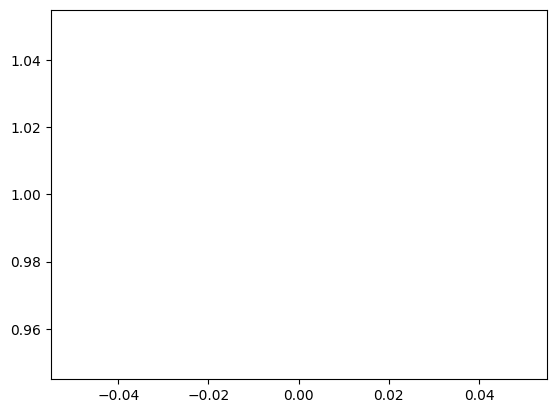

In [10]:
# lets check fits 
fits = []
for i in range(10):
    fit = 1 - eng.frobll1res(lwn_tensors[i], Us[i], nargout=1) / eng.frob(lwn_tensors[i], nargout=1)
    fits.append(fit)

                                                               

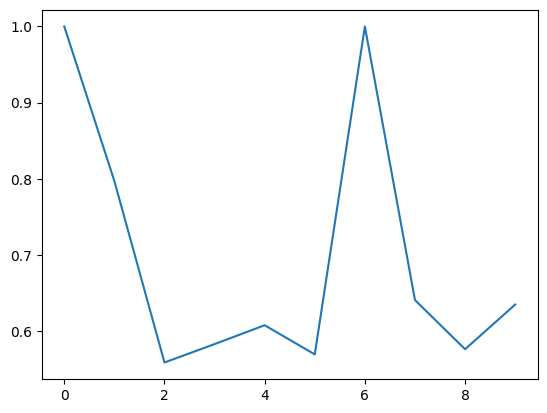

In [11]:
plt.plot(fits)

In [13]:

# recover sources
sources = list()
mixes = list()
for idx, model in enumerate(Us):
    tmp = ll1_tools.pack_ll1(model)
    mix = tmp[2]
    mixes.append(mix)
    print(f"obs: {obs[idx].shape}, mix: {mix.shape}")
    src = ll1_tools.recover_sources(obs[idx], mix)
    sources.append(src)

svds = []
for src in sources:
    svds.append(np.linalg.svd(src))

print(len(svds[0]))

obs: (979, 300), mix: (979, 25)
obs: (1133, 300), mix: (1133, 25)
obs: (1030, 300), mix: (1030, 25)
obs: (1008, 300), mix: (1008, 25)
obs: (980, 300), mix: (980, 25)
obs: (890, 300), mix: (890, 25)
obs: (956, 300), mix: (956, 25)
obs: (1027, 300), mix: (1027, 25)
obs: (973, 300), mix: (973, 25)
obs: (1008, 300), mix: (1008, 25)
3


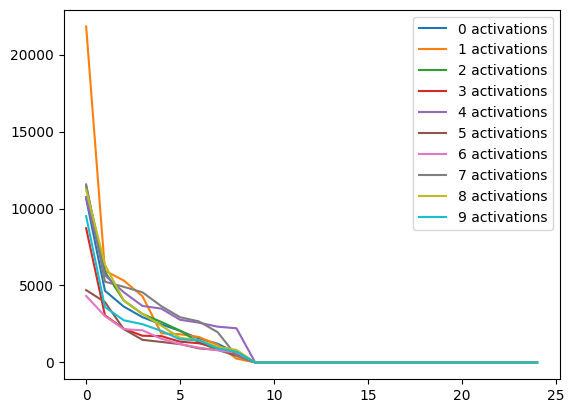

In [14]:
for idx,svd in enumerate(svds):
    plt.plot(svd[1], label = f"{idx} activations")

plt.legend()

[7.09981093e-14 7.51586010e-14 0.00000000e+00 6.73786496e-14
 7.82348622e-14 7.74312599e-14 7.92005170e-14 7.69723913e-14
 8.24387798e-14 8.36317380e-14]


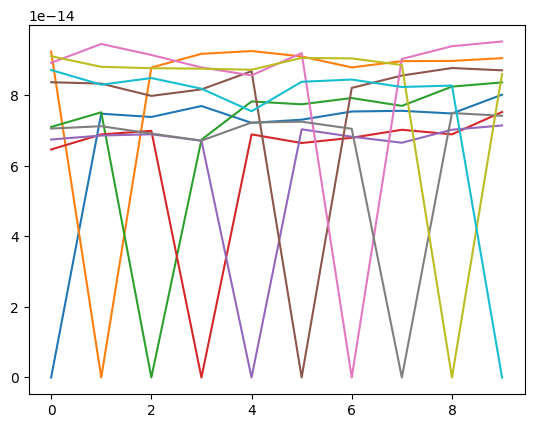

In [15]:
angles = np.zeros((len(svds), len(svds)))
for i in range(len(svds)):
    for j in range(len(svds)):
        if i != j:
            angles[i,j] = eng.rad2deg(eng.subspace(svds[i][0], svds[j][0]))

print(angles[2])
for i in range(len(svds)):
    plt.plot(angles[i])

### load raw loewnerized layer activations (10 tensors in all, activations grouped by targets 0-9)

In [3]:
# load 300 node and 100 node layer activations
layer_300_path = '/home/matthewmerris/repos/TensorizedRatNets/data/Lenet300100/activations/test/99/ten_acts/300_node_act_tens.npz'
# layer_300_path = '/Users/matthewmerris/dev/research/TensorizedRatNets/data/Lenet300100/activations/test/99/loewnerized_acts/300_node_act_tens.npz'
layer_300 = np.load(layer_300_path)

layer_100_path = '/home/matthewmerris/repos/TensorizedRatNets/data/Lenet300100/activations/test/99/ten_acts/100_node_act_tens.npz'
# layer_100_path = '/Users/matthewmerris/dev/research/TensorizedRatNets/data/Lenet300100/activations/test/99/loewnerized_acts/100_node_act_tens.npz'
layer_100 = np.load(layer_100_path)

## start with 300 node layer

In [5]:
lwn_0s = layer_300.f.arr_0
lwn_1s = layer_300.f.arr_1
lwn_2s = layer_300.f.arr_2
lwn_3s = layer_300.f.arr_3
lwn_4s = layer_300.f.arr_4
lwn_5s = layer_300.f.arr_5
lwn_6s = layer_300.f.arr_6
lwn_7s = layer_300.f.arr_7
lwn_8s = layer_300.f.arr_8
lwn_9s = layer_300.f.arr_9

# tensorlab_path = '~/ware/matlab_tools/tensorlab'
tensorlab_path = '/Users/matthewmerris/tools/matlab_tools/Tensorlab'

eng = matlab.engine.start_matlab()
s = eng.genpath(tensorlab_path)
eng.addpath(s, nargout=0)

num_terms = 25
rat_deg = 3

L = rat_deg * np.ones(num_terms)

print("Get started")

tic = time.perf_counter()
U_0s, out_0s = eng.ll1(lwn_0s, L, nargout=2)
toc_0 = time.perf_counter()
print(toc_0 - tic)
U_1s, out_1s = eng.ll1(lwn_1s, L, nargout=2)
toc_1 = time.perf_counter()
print(toc_1 - tic)
U_2s, out_2s = eng.ll1(lwn_2s, L, nargout=2)
toc_2 = time.perf_counter()
print(toc_2 - tic)
U_3s, out_3s = eng.ll1(lwn_3s, L, nargout=2)
toc_3 = time.perf_counter()
print(toc_3 - tic)
U_4s, out_4s = eng.ll1(lwn_4s, L, nargout=2)
toc_4 = time.perf_counter()
print(toc_4 - tic)
U_5s, out_5s = eng.ll1(lwn_5s, L, nargout=2)
toc_5 = time.perf_counter()
print(toc_5 - tic)
U_6s, out_6s = eng.ll1(lwn_6s, L, nargout=2)
toc_6 = time.perf_counter()
print(toc_6 - tic)
U_7s, out_7s = eng.ll1(lwn_7s, L, nargout=2)
toc_7 = time.perf_counter()
print(toc_7 - tic)
U_8s, out_8s = eng.ll1(lwn_8s, L, nargout=2)
toc_8 = time.perf_counter()
print(toc_8 - tic)
U_9s, out_9s = eng.ll1(lwn_9s, L, nargout=2)
toc = time.perf_counter()
print(toc-tic)
eng.quit()

Get started
556.8177259119693
1099.4501846970525
1641.6119135860354
2181.6056885269936
2717.803053193027
3256.391335780965
3793.7984189698473
4332.36916676187
4874.524110611994
5415.146984603023


In [ ]:
# data_path = '/Users/matthewmerris/dev/research/TensorizedRatNets/data/Lenet300100/activations/test/99/loewnerized_acts/'
data_path = '../tmp/'
btds_300terms = [U_0s, U_1s, U_2s, U_3s, U_4s, U_5s, U_6s, U_7s, U_8s, U_9s]

for idx, U in enumerate(btds_300terms):
    tmp_path = data_path + "U_300_{0}s".format(idx)
    tmp_U = ll1_tools.pack_ll1(U)
    np.savez(tmp_path, *tmp_U)

## repeat for 100 node layer activations



In [ ]:
lwn_0s = layer_100.f.arr_0
lwn_1s = layer_100.f.arr_1
lwn_2s = layer_100.f.arr_2
lwn_3s = layer_100.f.arr_3
lwn_4s = layer_100.f.arr_4
lwn_5s = layer_100.f.arr_5
lwn_6s = layer_100.f.arr_6
lwn_7s = layer_100.f.arr_7
lwn_8s = layer_100.f.arr_8
lwn_9s = layer_100.f.arr_9
print(lwn_0s.shape)

num_terms = 300
rat_deg = 9
L = rat_deg * np.ones(num_terms)

tensorlab_path = '~/ware/matlab_tools/tensorlab'
eng = matlab.engine.start_matlab()
s = eng.genpath(tensorlab_path)
eng.addpath(s, nargout=0)

tic = time.perf_counter()
U_0s, out_0s = eng.ll1(lwn_0s, L, nargout=2)
U_1s, out_1s = eng.ll1(lwn_1s, L, nargout=2)
U_2s, out_2s = eng.ll1(lwn_2s, L, nargout=2)
U_3s, out_3s = eng.ll1(lwn_3s, L, nargout=2)
U_4s, out_4s = eng.ll1(lwn_4s, L, nargout=2)
U_5s, out_5s = eng.ll1(lwn_5s, L, nargout=2)
U_6s, out_6s = eng.ll1(lwn_6s, L, nargout=2)
U_7s, out_7s = eng.ll1(lwn_7s, L, nargout=2)
U_8s, out_8s = eng.ll1(lwn_8s, L, nargout=2)
U_9s, out_9s = eng.ll1(lwn_9s, L, nargout=2)
toc = time.perf_counter()
print(toc-tic)
eng.quit()

In [17]:
print(len(U_0s))
print(np.asarray(U_0s[0][0]).shape)
testie = ll1_tools.pack_ll1(U_0s)

print(len(testie))
print(testie[0].shape)
print(testie[0][:,298])
print(testie[0][:,299])
print(testie[0][:,298:300])

100
(50, 3)
4
(50, 300)
[-0.33039722 -1.31003984 -0.25902115 -0.68675041 -1.16412474 -0.13810363
 -0.03033743 -0.02706033 -0.17376364  0.04667657 -0.20424197 -0.43641125
 -0.27704995 -0.18612709 -0.42686775 -0.20197896 -0.2428804  -0.3725198
  0.11480832  0.01414019  0.09226616 -0.38440661 -0.33524557 -0.31519364
 -1.63916272 -0.5631493  -0.22753205 -0.95618672  0.10736293 -0.04905727
 -0.83509784 -0.25861078 -0.29814635 -0.2836283   0.02325263 -0.35417272
 -0.63397981 -0.8596256  -0.25425238 -0.51003982 -0.23517823 -0.1673236
  0.00678466  0.0063223  -0.08862602 -0.53491352 -0.38469826 -0.04317131
 -1.0445606  -0.34313171]
[ 0.06386055  0.80769876  0.57486439  0.82731203  0.60377139  0.26957457
  0.24127764 -0.21186391  0.47025174 -0.40343545 -1.08708258 -0.62026891
 -0.86459278 -0.65562381 -0.81428569 -0.76806012 -0.81991031  0.50425157
  0.08533122  0.15296213  0.09921549 -0.28873427 -0.59574496 -0.47008737
  1.5500846   0.13771288 -0.64748666  0.15182138  0.13769463  0.2548125
  0.

In [41]:
btds_100terms = [U_0s, U_1s, U_2s, U_3s, U_4s, U_5s, U_6s, U_7s, U_8s, U_9s]

for idx, U in enumerate(btds_100terms):
    tmp_path = data_path + "U_100_{0}s".format(idx)
    tmp_U = ll1.pack_ll1(U)
    np.savez(tmp_path, *tmp_U)

# LOADING EXISTING LL1 decomps
## 300 node layer


In [10]:
data_path_300 = '../data/Lenet300100/activations/test/99/ten_acts/'

U_300s = list()
for i in range(10):
    tmp_path = data_path_300 + "U_300_{0}s.npz".format(i)
    tmp_data = np.load(tmp_path)
    tmp_list = [tmp_data.f.arr_0, tmp_data.f.arr_1, tmp_data.f.arr_2, tmp_data.f.arr_3]
    U_300s.append(tmp_list)

print(len(U_300s))
print(len(U_300s[0]))
print(U_300s[0][3])

10
4
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [12]:
print(U_300s[0][1].shape)
print(U_300s[0][2].shape[1])


(270000,)


IndexError: tuple index out of range

In [2]:
print(type(U_9s))
print(len(U_9s))

NameError: name 'U_9s' is not defined

300
(150, 3)
(150, 3)
(979, 1)
(3, 3)
[[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]]


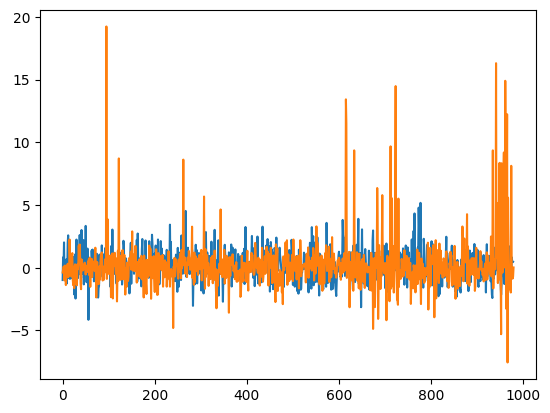

In [13]:
print(len(U_0s))
for x in U_0s[0]:
    print(np.asarray(x).shape)

print(U_0s[0][3])
plt.plot(U_0s[0][2])
plt.plot(U_1s[0][2])

In [15]:
lwn_0s_a = lwn_0s[:,:,0:50]
print(lwn_0s_a.shape)
lwn_0s_b = lwn_0s[:,:,51:101]
print(lwn_0s_a.shape)

(150, 150, 50)
(150, 150, 50)


In [16]:
# craft modal unfoldings
lwn_0s_a_1st_mode = np.transpose(tn.unfold(lwn_0s_a,0))
lwn_0s_a_2nd_mode = np.transpose(tn.unfold(lwn_0s_a,1))
lwn_0s_a_3rd_mode = np.transpose(tn.unfold(lwn_0s_a,2))

lwn_0s_b_1st_mode = np.transpose(tn.unfold(lwn_0s_b,0))
lwn_0s_b_2nd_mode = np.transpose(tn.unfold(lwn_0s_b,1))
lwn_0s_b_3rd_mode = np.transpose(tn.unfold(lwn_0s_b,2))



In [17]:
U_a, S_a, Vh_a = np.linalg.svd(lwn_0s_a_1st_mode)
U_b, S_b, Vh_b = np.linalg.svd(lwn_0s_b_1st_mode)

In [21]:
print(S_a.shape)
S_ratios = np.empty(149)
for i in range(0,149):
    S_ratios[i] = S_a[i+1]/S_a[i]

print(S_ratios)

(150,)
[0.56433308 0.44889316 0.69531588 0.98315553 0.94233122 0.85064799
 0.94879414 0.87794259 0.95117152 0.94751218 0.98223661 0.94172108
 0.99144344 0.92170257 0.96569107 0.96365556 0.96325385 0.94480972
 0.97012089 0.96320909 0.95523838 0.97396641 0.96058435 0.97671369
 0.9731696  0.99404064 0.96694699 0.98857592 0.98540212 0.96424822
 0.97168094 0.96713192 0.95696502 0.95831649 0.99252316 0.99172818
 0.99207097 0.97792605 0.94298341 0.98829583 0.97806643 0.98703474
 0.96411285 0.95252151 0.96146757 0.98916077 0.99411588 0.98981906
 0.97856995 0.97238398 0.98000725 0.95401515 0.99565915 0.94753394
 0.99794698 0.97140094 0.99069322 0.9826844  0.98356411 0.97643658
 0.99532137 0.97228973 0.9492495  0.96664627 0.94614031 0.97810627
 0.96931634 0.9762341  0.98326599 0.97869075 0.97133968 0.98091349
 0.94786515 0.96276267 0.98571788 0.94805287 0.97535624 0.95236978
 0.99810322 0.93847632 0.97826729 0.9520868  0.94194819 0.96375032
 0.97136092 0.98737911 0.95230829 0.98247984 0.92421608

### Compare column spaces ala Domanov and De Lathauwer

In [3]:
# load activations and separate by target
targets_path = '../data/Lenet300100/activations/test/targets.npy'
targets = np.load(targets_path)

inputs_path = '../data/Lenet300100/activations/test/99/Linear_0.npy'
inputs_raw = np.load(inputs_path)

outputs_path = '../data/Lenet300100/activations/test/99/Rational_1.npy'
outputs_raw = np.load(outputs_path)

# tensorlab_path = '~/ware/matlab_tools/tensorlab'
tensorlab_path = '/Users/matthewmerris/tools/matlab_tools/Tensorlab'

# reshape inputs and outputs to matrices
inputs = inputs_raw.reshape(-1, inputs_raw.shape[-1])
outputs = outputs_raw.reshape(-1, outputs_raw.shape[-1])
 
# instantiate empty containers for splitting activations according to target
i_targets = list()
o_targets = list()
for i in range(0,10):
    i_targets.append(np.empty((0,inputs.shape[1])))
    o_targets.append(np.empty((0,outputs.shape[1])))

# split activations according to targets
for idx, x in enumerate(targets):
    o_targets[x] = np.vstack([o_targets[x], outputs[idx, :]])
    i_targets[x] = np.vstack([i_targets[x], inputs[idx, :]])

In [4]:
# lets try for the "0" target
out_300_0s = o_targets[0]
in_300_0s = i_targets[0]
print(out_300_0s.shape)
print(out_300_0s.dtype)
print(in_300_0s.shape)
print(in_300_0s.dtype)

lwn_0s = list()
sz_dims = math.ceil(out_300_0s.shape[1]/3)

eng = matlab.engine.start_matlab()
s = eng.genpath(tensorlab_path)
eng.addpath(s, nargout=0)

for i in range(out_300_0s.shape[0]):
    tmp = np.asarray(eng.loewnerize(out_300_0s[i,:], 'T', in_300_0s[i,:], nargout=1))  # NOTE: hardcoded loewnerize to 'Order' 3 !!!
    lwn_0s.append(tmp)

print(lwn_0s[0].shape)


(979, 300)
float64
(979, 300)
float64
(100, 100, 100)


In [5]:
print(len(lwn_0s))
rank_0s = list()
Us_0s = list()
num_samps = 5
for i in range (num_samps):
    U, S, Vh = np.linalg.svd(np.transpose(tn.unfold(lwn_0s[i],0)))
    Us_0s.append(U)
    rank = 0
    for j in range(S.shape[0] - 1):
        if S[j] - S[j+1] < .01 and rank == 0:
            rank = j
            rank_0s.append(rank)

rank_0s = np.asarray(rank_0s)      
        

979


In [6]:
print(rank_0s)
print(Us_0s[0].shape[0])

[5 4 3 3 7]
10000


[1.29571535 1.14564735 1.00033874 1.00004495 1.         0.99995505
 0.99966114 0.82915146 0.56667603]
[1.31823565 1.19754402 1.00012849 1.         1.         0.9998715
 0.75225548 0.51210816]
[1.30858037 1.22156713 1.00009544 1.         1.         0.99990455
 0.71258245 0.53629974]
[1.3372083  1.2662123  1.00041797 1.00027045 1.0000866  1.
 1.         0.99991339 0.99972948 0.99958185 0.62984635 0.4602977 ]
[1.29571535 1.14564735 1.00033874 1.00004495 1.         0.99995505
 0.99966114 0.82915146 0.56667603]
[1.32498012 1.23099409 1.00004639 1.         0.99995361 0.69617064
 0.49439627]
[1.29465145 1.20978676 1.000115   1.         0.99988499 0.73240426
 0.56910247]
[1.32772451 1.21081096 1.00029885 1.00003902 1.         1.
 1.         0.99996098 0.99970106 0.7307098  0.48697807]
[1.31823565 1.19754402 1.00012849 1.         1.         0.9998715
 0.75225548 0.51210816]
[1.32498012 1.23099409 1.00004639 1.         0.99995361 0.69617064
 0.49439627]
[1.29506438 1.18813445 1.0000088  0.999991

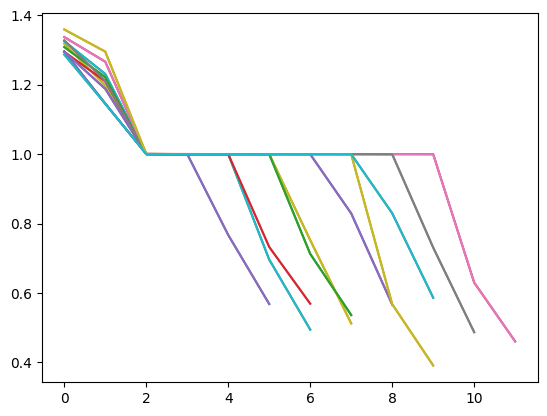

In [7]:
num_samps = 5
mix = np.zeros((num_samps,num_samps), int)

for i in range(num_samps):
    for j in range(num_samps):
        if i != j:
            # construct combined U matrix (rank_0s[i] columns from Us_0s[i] + rank_0s[j] columns from Us_0s[j]
            U_ij = np.concatenate([Us_0s[i][:, 0:rank_0s[i]], Us_0s[j][:,0:rank_0s[j]]], axis=1)
            U, S, Vh = np.linalg.svd(U_ij)
            print(S)
            plt.plot(S)
            if S[(rank_0s[j] + 1)] < 0.1:
                mix[i,j] = 1

print(mix)


In [43]:
# apply method to the 1st 2 observed signals
U_0, S_0, Vh_0 = np.linalg.svd(np.transpose(tn.unfold(lwn_0s[0], 0)))
U_1, S_1, Vh_1 = np.linalg.svd(np.transpose(tn.unfold(lwn_0s[1], 0)))

In [68]:
S_0_ratios = np.empty(S_0.shape[0] - 1)
S_1_ratios = np.empty(S_1.shape[0] - 1)
S_0_diffs = np.empty(S_0.shape[0] - 1)
S_1_diffs = np.empty(S_1.shape[0] - 1)
for i in range (S_0.shape[0]-1):
    S_0_ratios[i] = S_0[i] / S_0[i+1]
    S_0_diffs[i] = S_0[i] - S_0[i+1]
    S_1_ratios[i] = S_1[i] / S_1[i+1]
    S_1_diffs[i] = S_1[i] - S_1[i+1]
print(S_0_ratios)

[1.70458947e+00 1.55531850e+03 4.96365932e+00 1.74181621e+00
 1.25667736e+00 1.14712649e+00 1.87740453e+00 1.08683063e+00
 1.49917156e+00 1.11066714e+00 1.21687536e+00 1.31416456e+00
 1.05418568e+00 1.04171136e+00 1.13641176e+00 1.14137398e+00
 1.05724146e+00 1.10517009e+00 1.21659023e+00 1.15702377e+00
 1.03483622e+00 1.01375032e+00 1.08053137e+00 1.05138224e+00
 1.07293154e+00 1.02844092e+00 1.01196157e+00 1.00926801e+00
 1.06732218e+00 1.00992104e+00 1.00878118e+00 1.01373932e+00
 1.02310991e+00 1.02088527e+00 1.07104045e+00 1.02461979e+00
 1.27912991e+00 1.01778101e+00 1.00549872e+00 1.07023494e+00
 1.05880891e+00 1.03995828e+00 1.15179130e+00 1.01606760e+00
 1.01457861e+00 1.08598002e+00 1.11114785e+00 1.07332252e+00
 1.02343790e+00 1.02150591e+00 1.06252083e+00 1.03434079e+00
 1.04444951e+00 1.02169768e+00 1.05160142e+00 1.06139560e+00
 1.12955413e+00 1.04491183e+00 1.09710765e+00 1.05632700e+00
 1.09561718e+00 1.01927349e+00 1.08205278e+00 1.02204915e+00
 1.01498242e+00 1.078794

[5.74599100e+02 8.14984732e+02 4.18700819e-01 4.49884969e-02
 1.23870796e-02 6.18957637e-03 1.96612931e-02 1.79028954e-03
 6.86513104e-03 1.37035710e-03 2.20688244e-03 2.43263200e-03
 3.98003259e-04 2.94109535e-04 8.46390557e-04 7.68529446e-04
 2.94325282e-04 4.89305367e-04 8.28289701e-04 5.18998995e-04
 1.11265506e-04 4.33222800e-05 2.34815204e-04 1.42499541e-04
 1.88514094e-04 7.14813601e-05 2.97079963e-05 2.28068428e-05
 1.55217688e-04 2.26492023e-05 1.98724454e-05 3.06716805e-05
 5.04252842e-05 4.46388763e-05 1.41766286e-04 4.79500247e-05
 4.25007156e-04 2.66006266e-05 8.18117984e-06 9.76400751e-05
 7.72147754e-05 5.04484817e-05 1.66385111e-04 1.73338888e-05
 1.55015557e-05 8.41850465e-05 9.79414785e-05 6.01967097e-05
 1.88015037e-05 1.68884872e-05 4.62083272e-05 2.45381677e-05
 3.04096449e-05 1.45289851e-05 3.28573458e-05 3.68324642e-05
 6.88078157e-05 2.28279852e-05 4.49894916e-05 2.47044894e-05
 3.82768612e-05 7.56954887e-06 2.97820447e-05 7.83035111e-06
 5.24219143e-06 2.555557

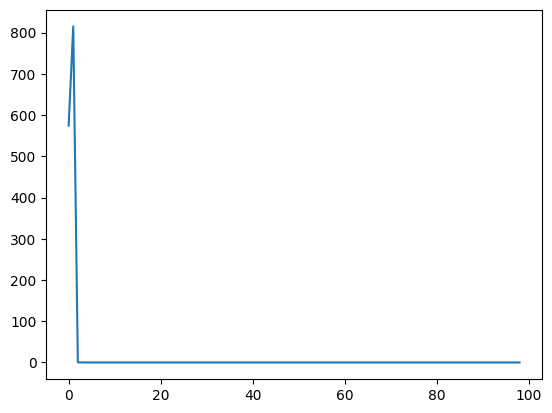

In [73]:
plt.plot(S_0_diffs)
print(S_0_diffs)


[8.36768483e+02 8.15878291e+02 4.31870454e+00 1.03213564e-01
 4.51325045e-02 5.02954307e-02 3.34284222e-03 1.93656414e-03
 1.41102810e-03 4.91327031e-03 2.48161832e-03 9.69428120e-03
 1.43684544e-04 4.14564285e-04 4.93954900e-04 1.86912833e-03
 3.99167617e-03 7.35423772e-04 1.66838175e-03 3.36596467e-04
 1.80111715e-04 6.08276479e-04 1.06123340e-03 2.69027468e-04
 5.08140623e-04 5.85790603e-05 4.97464680e-05 4.11586418e-04
 3.65788373e-04 4.64572181e-04 4.50392093e-04 9.32195187e-05
 7.91543769e-04 2.62847325e-04 2.46779710e-05 9.15308137e-04
 2.15418131e-04 3.54067155e-04 3.29348421e-04 2.45518586e-05
 8.83259050e-05 3.75994753e-05 1.52374813e-04 3.49477000e-04
 9.78998304e-05 1.06073812e-04 3.11471289e-05 7.80262854e-05
 1.09488189e-04 6.81063563e-05 2.62103677e-05 2.98481803e-05
 5.99599559e-06 1.40941686e-05 4.04434953e-05 1.11502226e-05
 2.51197501e-05 5.53142607e-05 1.38050745e-05 7.55687983e-05
 1.44564867e-05 3.06778885e-05 7.79358162e-05 5.77917127e-05
 2.06039099e-05 2.305979

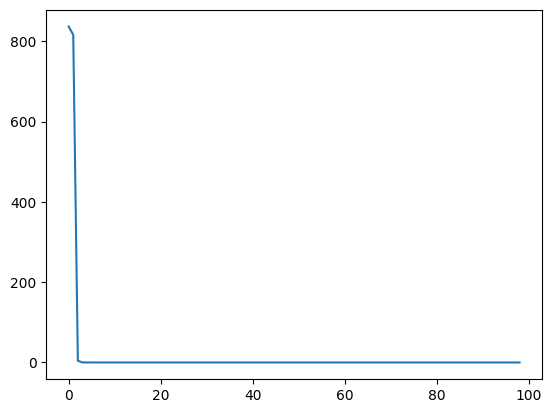

In [72]:
plt.plot(S_1_diffs)
print(S_1_diffs)